In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9/export?format=xlsx' -O ViceVirtual_Data.xlsx

--2024-06-24 18:23:38--  https://docs.google.com/spreadsheets/d/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9/export?format=xlsx
Resolving docs.google.com (docs.google.com)... 172.217.203.102, 172.217.203.100, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0s-34-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/lugfvf6gni7cbldnvqf64d52nc/1719253415000/102244963013105044552/*/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9?format=xlsx [following]
--2024-06-24 18:23:38--  https://doc-0s-34-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/lugfvf6gni7cbldnvqf64d52nc/1719253415000/102244963013105044552/*/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9?format=xlsx
Resolving doc-0s-34-sheets.googleusercontent.com (doc-0s-34-sheets.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-0s-34-sheets.googleusercontent.com (doc-0s-34-sheets.

In [3]:
df = pd.read_excel('ViceVirtual_Data.xlsx')
df = df.rename(columns={'g': 'age'})
df = df.rename(columns={'[cg3': 'pcg3'})
df

,age,gender,income,spent,pc1,pc2,pc3,pc4,gh2,gh1,...,v12,v13,v14,PC_TOTAL,GH_TOTAL,DR_TOTAL,TS_TOTAL,PCS_TOTAL,PCG_TOTAL,V_TOTAL
0,25,1,50000,20000,3,5,4,5,3,4,...,4,4,4,4.25,3.88,3.9,4.19,4.00,4.29,4.43
1,39,2,100000,35000,4,5,3,4,5,4,...,4,4,3,4.00,4.38,4.2,4.00,3.00,3.29,3.21
2,32,1,75000,25000,4,4,4,4,4,5,...,3,4,3,4.00,4.63,4.5,4.50,4.67,4.00,3.50
3,36,1,240000,60000,1,1,1,1,1,1,...,5,5,5,1.00,1.00,1.0,2.00,5.00,5.00,5.00
4,36,2,60000,20000,3,4,4,3,3,4,...,5,5,5,3.50,3.50,3.8,4.19,4.67,4.57,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,50,3,100000,30000,5,4,4,5,4,5,...,5,5,4,4.50,4.50,4.4,4.56,4.33,4.00,4.50
396,45,2,120000,35000,5,4,5,4,3,4,...,5,3,4,4.50,4.63,4.5,4.50,4.67,3.86,4.21
397,32,1,50000,15000,4,4,5,4,3,2,...,5,5,4,4.25,4.00,4.4,4.25,4.33,4.14,4.21
398,34,2,65000,15000,4,5,4,4,5,4,...,5,3,4,4.25,4.63,4.4,4.63,5.00,4.00,4.07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 73 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        400 non-null    int64  
 1   gender     400 non-null    int64  
 2   income     400 non-null    int64  
 3   spent      400 non-null    int64  
 4   pc1        400 non-null    int64  
 5   pc2        400 non-null    int64  
 6   pc3        400 non-null    int64  
 7   pc4        400 non-null    int64  
 8   gh2        400 non-null    int64  
 9   gh1        400 non-null    int64  
 10  gh3        400 non-null    int64  
 11  gh4        400 non-null    int64  
 12  gh5        400 non-null    int64  
 13  gh6        400 non-null    int64  
 14  gh7        400 non-null    int64  
 15  gh8        400 non-null    int64  
 16  dr1        400 non-null    int64  
 17  dr2        400 non-null    int64  
 18  dr3        400 non-null    int64  
 19  dr4        400 non-null    int64  
 20  dr5       

In [5]:
df.describe()

,age,gender,income,spent,pc1,pc2,pc3,pc4,gh2,gh1,...,v12,v13,v14,PC_TOTAL,GH_TOTAL,DR_TOTAL,TS_TOTAL,PCS_TOTAL,PCG_TOTAL,V_TOTAL
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,40.035000,1.66750,86350.000000,33780.000000,3.880000,3.932500,3.982500,3.867500,3.935000,3.782500,...,3.957500,3.852500,3.932500,3.915625,4.023050,3.948750,3.811100,4.071550,3.99545,4.021025
std,10.076339,0.64652,46318.635991,28773.100777,0.873216,0.851326,0.916129,0.980994,0.864664,0.895656,...,0.939628,0.928925,0.911054,0.674156,0.507725,0.560432,0.592687,0.565039,0.56695,0.471416
min,23.000000,1.00000,45000.000000,15000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.330000,2.00000,2.290000
25%,32.000000,1.00000,50000.000000,20000.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,4.000000,3.500000,3.750000,3.600000,3.440000,3.670000,3.67500,3.710000
50%,36.000000,2.00000,75000.000000,25000.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.880000,4.000000,4.00000,4.140000
75%,47.000000,2.00000,100000.000000,35000.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,...,5.000000,5.000000,5.000000,4.312500,4.380000,4.400000,4.250000,4.330000,4.43000,4.360000
max,65.000000,3.00000,240000.000000,150000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [6]:
df.columns

Index(['age', 'gender', 'income', 'spent', 'pc1', 'pc2', 'pc3', 'pc4', 'gh2',
       'gh1', 'gh3', 'gh4', 'gh5', 'gh6', 'gh7', 'gh8', 'dr1', 'dr2', 'dr3',
       'dr4', 'dr5', 'dr6', 'dr7', 'dr8', 'dr9', 'dr10', 'ts1', 'ts2', 'ts3',
       'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'ts9', 'ts10', 'ts11', 'ts12',
       'ts13', 'ts14', 'ts15', 'ts16', 'pcs1', 'pcs2', 'pcs3', 'pcg1', 'pcg2',
       'pcg3', 'pcg4', 'pcg5', 'pcg6', 'pcg7', 'v1', 'v2', 'v3', 'v4', 'v5',
       'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'PC_TOTAL',
       'GH_TOTAL', 'DR_TOTAL', 'TS_TOTAL', 'PCS_TOTAL', 'PCG_TOTAL',
       'V_TOTAL'],
      dtype='object')

# Insights from given data

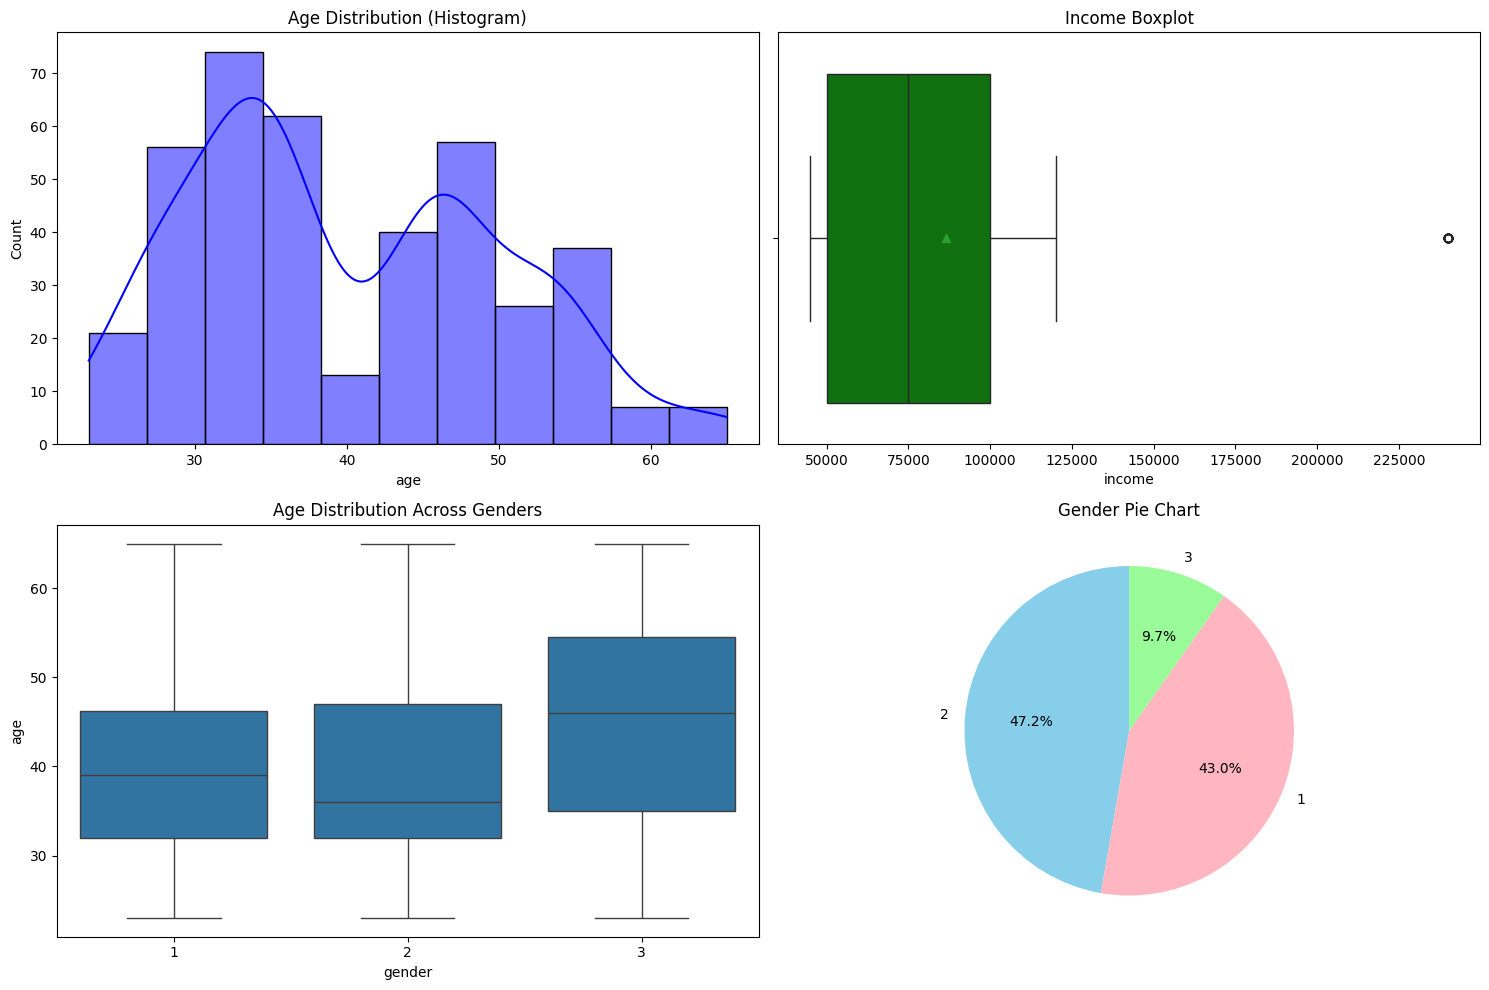

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(df['age'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Histogram)')

sns.boxplot(x=df['income'], color='green', showmeans=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Boxplot')

sns.boxplot(x='gender', y='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution Across Genders')

gender_counts = df['gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink', 'palegreen'])
axes[1, 1].set_title('Gender Pie Chart')

plt.tight_layout()
plt.show()

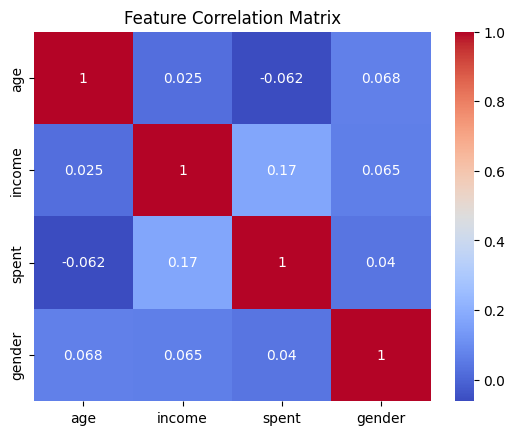

In [8]:
corr_matrix = df[['age', 'income', 'spent', 'gender']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

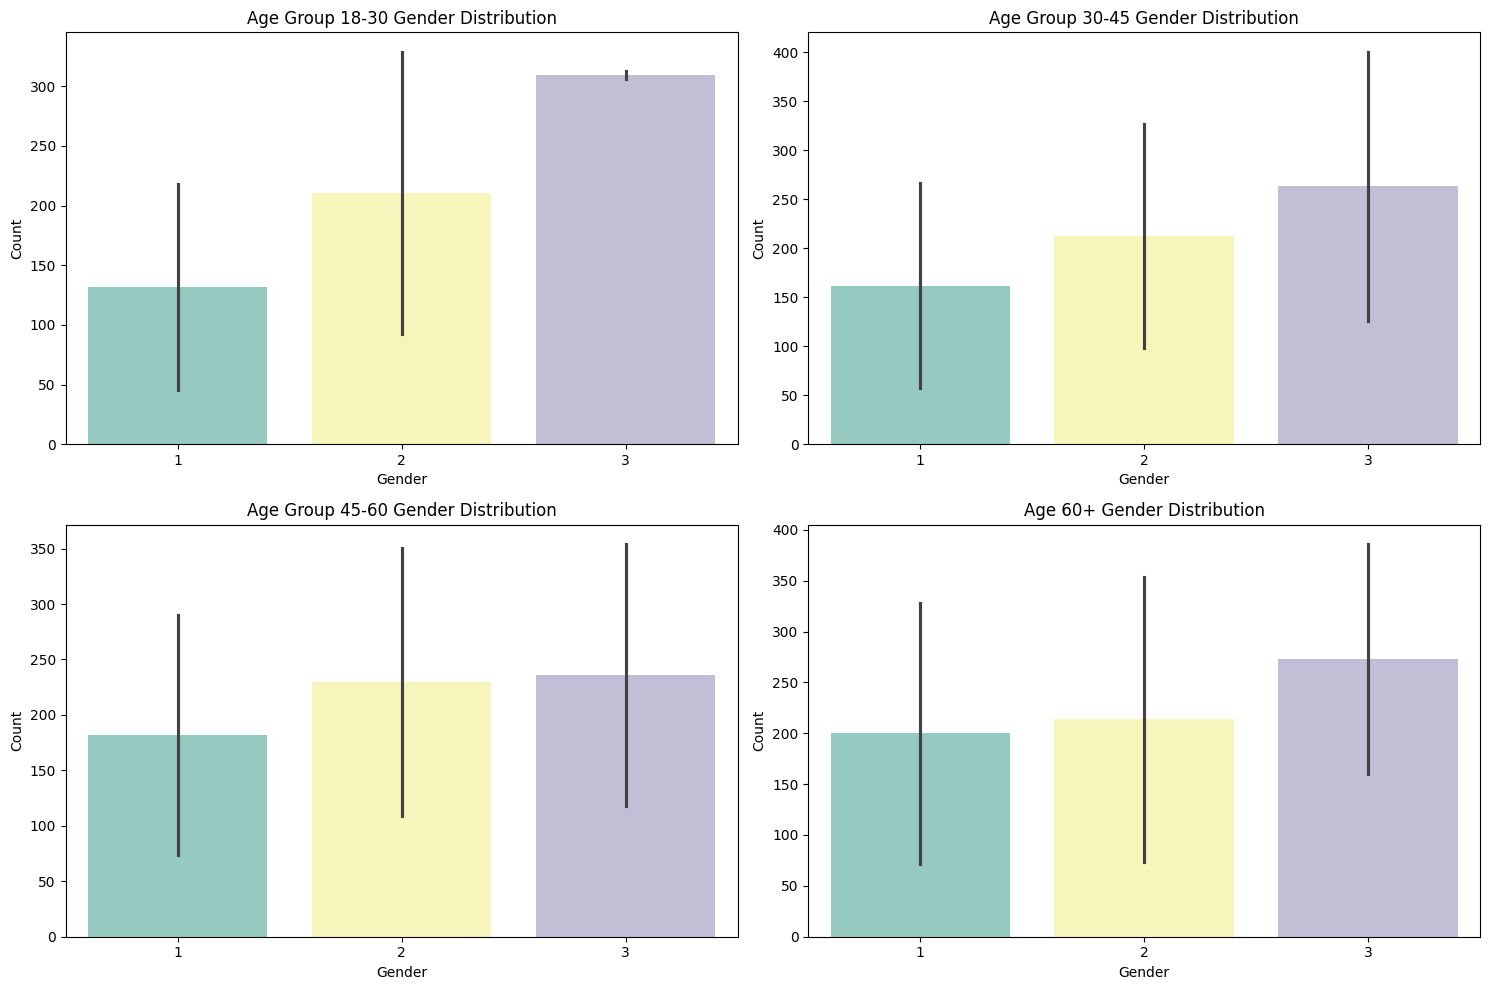

In [9]:
age_groups = [18, 30, 45, 60, np.inf]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (lower_bound, upper_bound) in enumerate(zip(age_groups[:-1], age_groups[1:])):
    if upper_bound is np.inf:
        # Special case for 60+
        gender_grouped = df[df['age'] >= lower_bound]
        age_label = f'Age 60+'
    else:
        gender_grouped = df[(df['age'] >= lower_bound) & (df['age'] < upper_bound)]
        age_label = f'Age Group {lower_bound}-{upper_bound}'

    row = i // 2
    col = i % 2

    sns.barplot(x='gender', y=gender_grouped.index, data=gender_grouped, hue='gender', palette='Set3',
                errorbar='sd', ax=axes[row, col], legend=False)
    axes[row, col].set_title(f'{age_label} Gender Distribution')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xlabel('Gender')

plt.tight_layout()
plt.show()

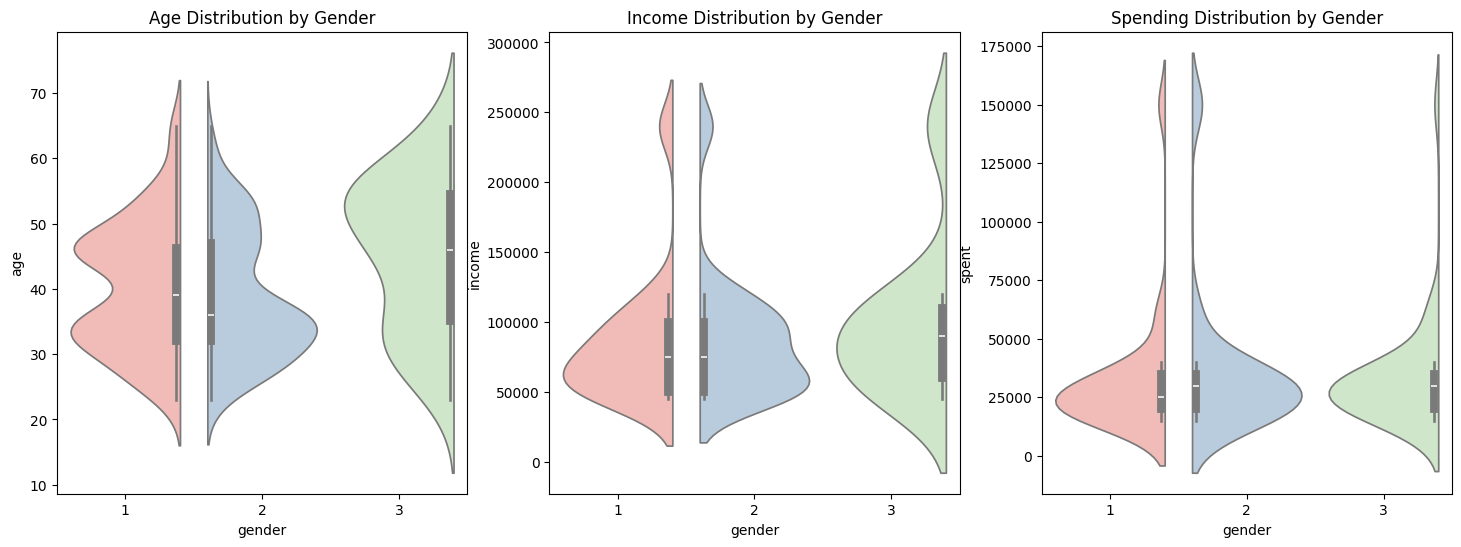

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# For age distribution by gender
sns.violinplot(x='gender', y='age', data=df, ax=ax[0], hue='gender', palette='Pastel1', split=True, legend=False)
ax[0].set_title('Age Distribution by Gender')

# For income distribution by gender
sns.violinplot(x='gender', y='income', data=df, ax=ax[1], hue='gender', palette='Pastel1', split=True, legend=False)
ax[1].set_title('Income Distribution by Gender')

# For spending distribution by gender
sns.violinplot(x='gender', y='spent', data=df, ax=ax[2], hue='gender', palette='Pastel1', split=True, legend=False)
ax[2].set_title('Spending Distribution by Gender')

plt.show()

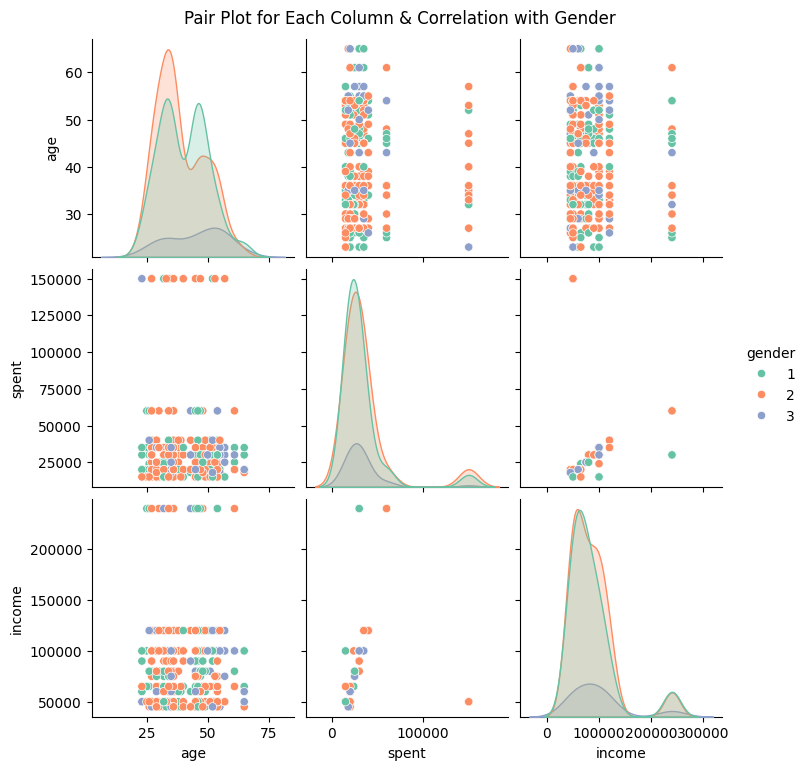

In [11]:
pair_plot = sns.pairplot(df[['age', 'spent', 'income', 'gender']], hue='gender', palette='Set2')
pair_plot.fig.suptitle('Pair Plot for Each Column & Correlation with Gender', y=1.02)
plt.show()

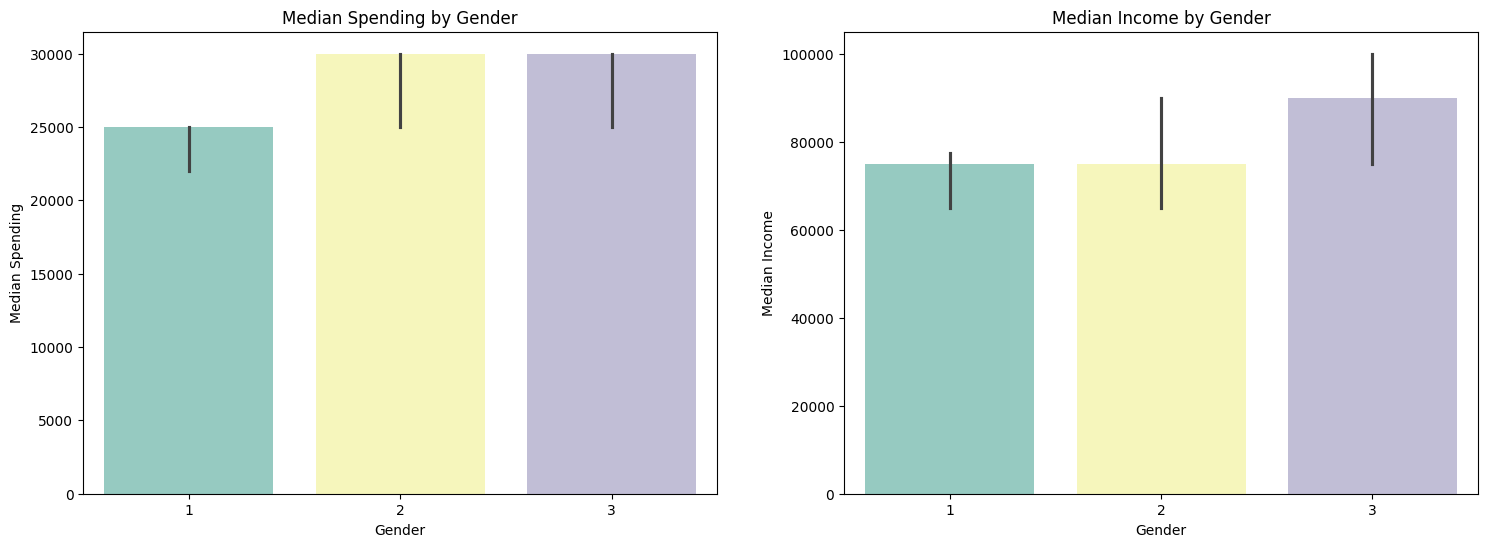

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# For Median Spending by Gender
sns.barplot(x='gender', y='spent', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[0], legend=False)
ax[0].set_title('Median Spending by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Median Spending')

# For Median Income by Gender
sns.barplot(x='gender', y='income', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[1], legend=False)
ax[1].set_title('Median Income by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Median Income')

plt.show()

# X1-X7 Correlation

In [13]:
X1_PC = df[['pc1', 'pc2', 'pc3', 'pc4']].sum(axis=1) / 4
X2_HTAS = df[['gh1', 'gh2', 'gh3', 'gh4', 'gh5', 'gh6', 'gh7', 'gh8']].sum(axis=1) / 8
X3_DHC = df[['dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'dr8', 'dr9', 'dr10']].sum(axis=1) / 10
X4_TSRQ = df[['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'ts9', 'ts10', 'ts11', 'ts12', 'ts13', 'ts14', 'ts15', 'ts16']].sum(axis=1) / 16
X5_PCS = df[['pcs1', 'pcs2', 'pcs3']].sum(axis=1) / 3
X6_PGT = df[['pcg1', 'pcg2', 'pcg3', 'pcg4', 'pcg5', 'pcg6', 'pcg7']].sum(axis=1) / 7
X7_VICE = df[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14']].sum(axis=1) / 14

df['X1_PC'] = X1_PC
df['X2_HTAS'] = X2_HTAS
df['X3_DHC'] = X3_DHC
df['X4_TSRQ'] = X4_TSRQ
df['X5_PCS'] = X5_PCS
df['X6_PGT'] = X6_PGT
df['X7_VICE'] = X7_VICE

df.head()

,age,gender,income,spent,pc1,pc2,pc3,pc4,gh2,gh1,...,PCS_TOTAL,PCG_TOTAL,V_TOTAL,X1_PC,X2_HTAS,X3_DHC,X4_TSRQ,X5_PCS,X6_PGT,X7_VICE
0,25,1,50000,20000,3,5,4,5,3,4,...,4.00,4.29,4.43,4.25,3.875,3.9,4.1875,4.000000,4.285714,4.428571
1,39,2,100000,35000,4,5,3,4,5,4,...,3.00,3.29,3.21,4.00,4.375,4.2,4.0000,3.000000,3.285714,3.214286
2,32,1,75000,25000,4,4,4,4,4,5,...,4.67,4.00,3.50,4.00,4.625,4.5,4.5000,4.666667,4.000000,3.500000
3,36,1,240000,60000,1,1,1,1,1,1,...,5.00,5.00,5.00,1.00,1.000,1.0,2.0000,5.000000,5.000000,5.000000
4,36,2,60000,20000,3,4,4,3,3,4,...,4.67,4.57,4.93,3.50,3.500,3.8,4.1875,4.666667,4.571429,4.928571


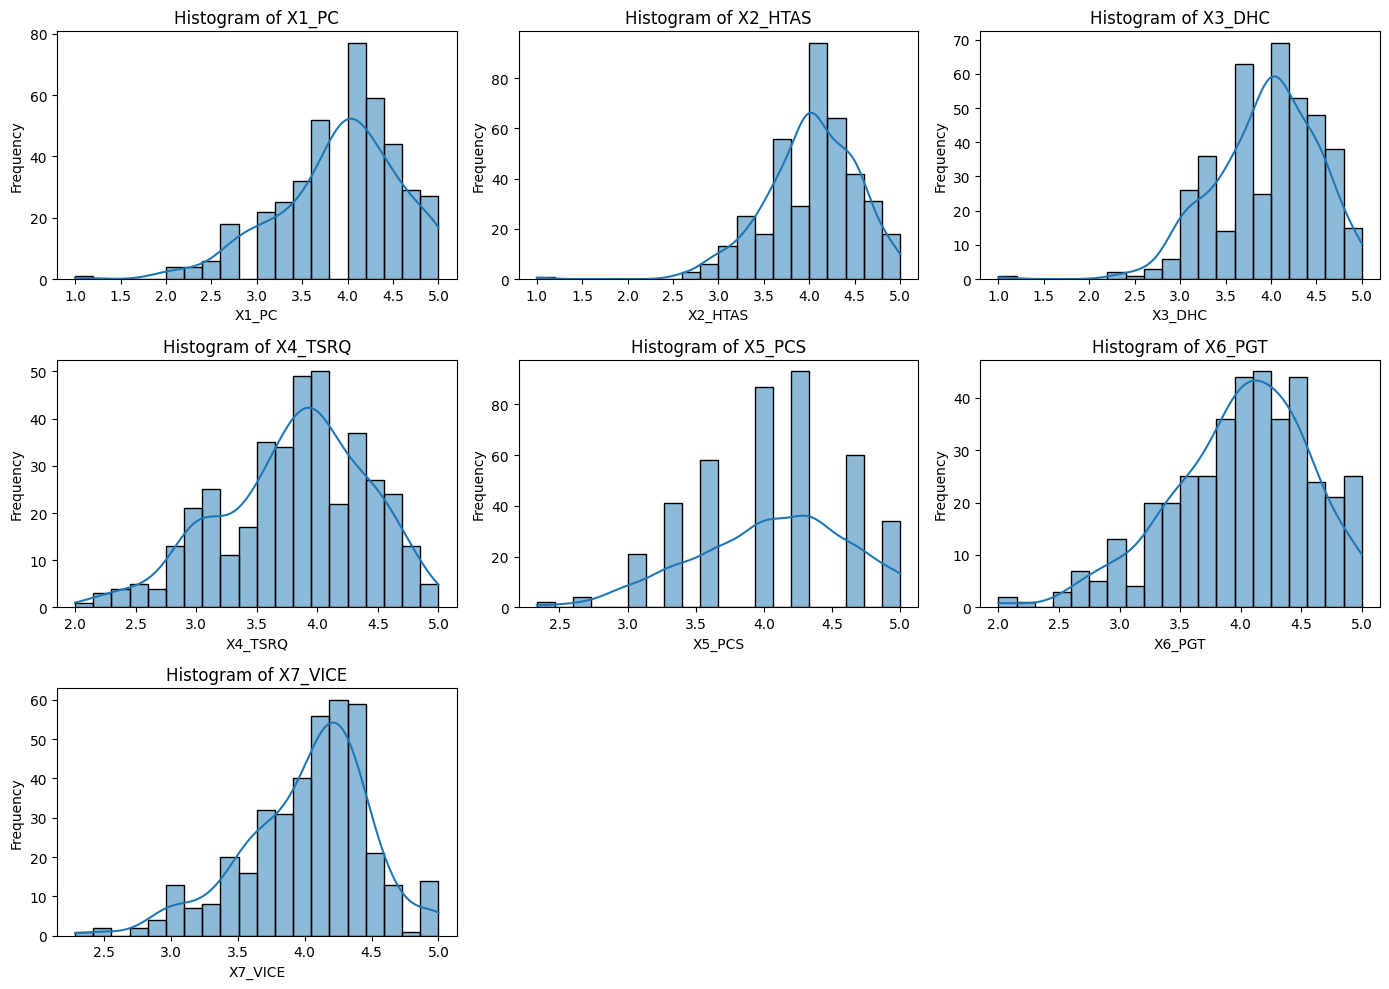

In [14]:
variables = ['X1_PC', 'X2_HTAS', 'X3_DHC', 'X4_TSRQ', 'X5_PCS', 'X6_PGT', 'X7_VICE']

plt.figure(figsize=(14, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)  # 3x3 grid, adjust if you have more variables
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


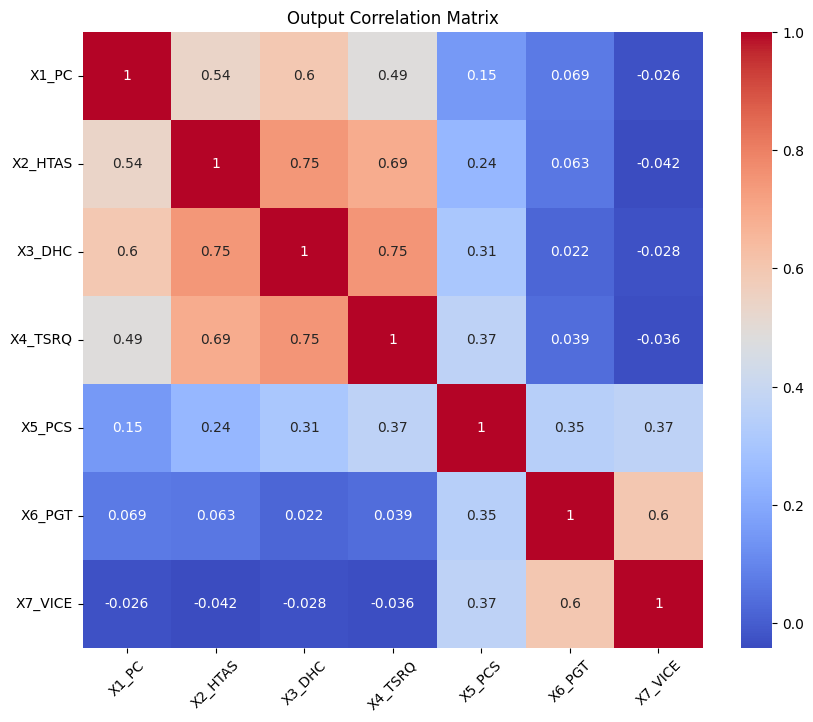

In [15]:
corr_matrix = df[['X1_PC', 'X2_HTAS', 'X3_DHC', 'X4_TSRQ', 'X5_PCS', 'X6_PGT', 'X7_VICE']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Output Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [16]:
dependent_vars = ['age', 'income', 'spent','gender']
independent_vars = ['X1_PC', 'X2_HTAS', 'X3_DHC', 'X4_TSRQ', 'X5_PCS', 'X6_PGT', 'X7_VICE']

Most Important Variables for Each Dependent Variable:
age       X2_HTAS
income     X3_DHC
spent      X3_DHC
gender     X5_PCS
dtype: object

Second Most Important Variables for Each Dependent Variable:
age        X3_DHC
income    X7_VICE
spent     X4_TSRQ
gender     X6_PGT
dtype: object


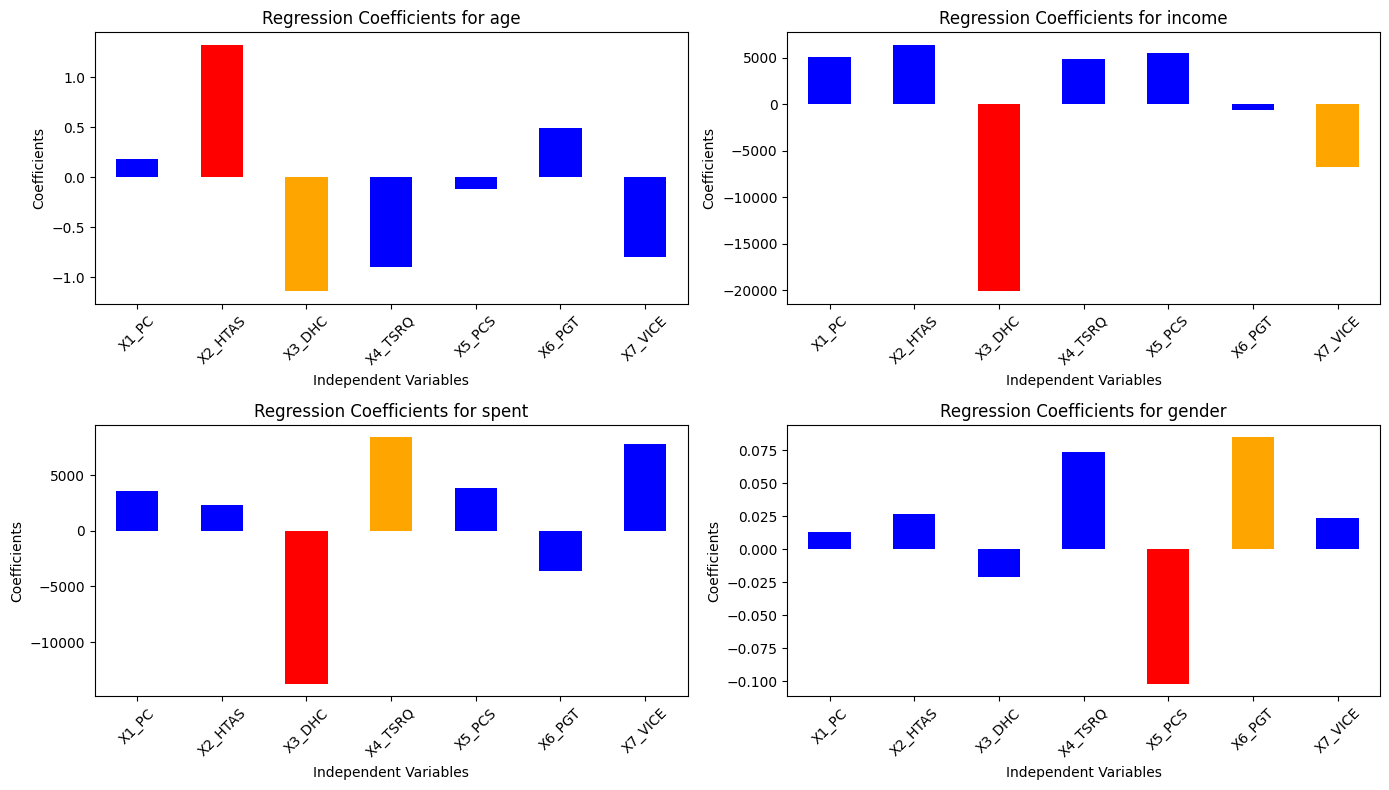

In [17]:
# Function to perform regression and get coefficients and p-values
def perform_regression(dep_var, indep_vars):
    X = df[indep_vars]
    y = df[dep_var]
    X = sm.add_constant(X)  # Adding a constant
    model = sm.OLS(y, X).fit()
    return model.params, model.pvalues

# DataFrame to store coefficients and p-values
coefficients = pd.DataFrame()
pvalues = pd.DataFrame()

# Perform regression for each dependent variable
for dep_var in dependent_vars:
    coeffs, pvals = perform_regression(dep_var, independent_vars)
    coefficients[dep_var] = coeffs
    pvalues[dep_var] = pvals

# Finding the most and second most important independent variables for each dependent variable
most_important_vars = coefficients.drop('const').abs().idxmax()
second_most_important_vars = coefficients.drop('const').abs().apply(lambda col: col.nlargest(2).idxmin())

# Print the most important variables
print("Most Important Variables for Each Dependent Variable:")
print(most_important_vars)
print("\nSecond Most Important Variables for Each Dependent Variable:")
print(second_most_important_vars)

# Plot coefficients and highlight the most important and second most important variables
plt.figure(figsize=(14, 8))
for i, dep_var in enumerate(dependent_vars):
    plt.subplot(2, 2, i+1)
    coeffs = coefficients[dep_var].drop('const')
    important_var = most_important_vars[dep_var]
    second_important_var = second_most_important_vars[dep_var]
    colors = ['red' if var == important_var else 'orange' if var == second_important_var else 'blue' for var in coeffs.index]
    coeffs.plot(kind='bar', color=colors)
    plt.title(f'Regression Coefficients for {dep_var}')
    plt.xlabel('Independent Variables')
    plt.ylabel('Coefficients')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

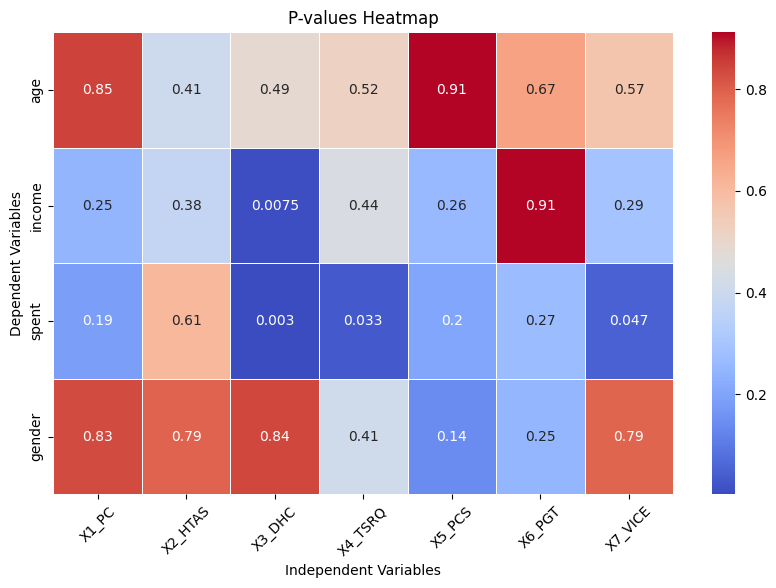

In [18]:
# Plot p-values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pvalues.drop(index='const').T, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('P-values Heatmap')
plt.xlabel('Independent Variables')
plt.ylabel('Dependent Variables')
plt.xticks(rotation=45)
plt.show()

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def regression_summary(df, dependent_var):
    independent_vars = ['X1_PC', 'X2_HTAS', 'X3_DHC', 'X4_TSRQ', 'X5_PCS', 'X6_PGT', 'X7_VICE']

    # Function to perform regression and get coefficients and p-values
    def perform_regression(dep_var, indep_vars):
        X = df[indep_vars]
        y = df[dep_var]
        X = sm.add_constant(X)  # Adding a constant
        model = sm.OLS(y, X).fit()
        return model

    model = perform_regression(dependent_var, independent_vars)

    # Get regression statistics
    coefficients = model.params
    standard_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues

    # Compute VIF and Tolerance
    X = df[independent_vars]
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Tolerance"] = 1 / vif["VIF"]

    # Create summary DataFrame
    summary_df = pd.DataFrame({
        "B": coefficients,
        "S.E.": standard_errors,
        "Beta": coefficients / standard_errors,
        "t": t_values,
        "Sig.": p_values,
    })
    summary_df = summary_df.join(vif.set_index('Variable'), how='inner')

    # Format the DataFrame
    summary_df_formatted = summary_df.style.set_caption("Regression Summary").format({
        "B": "{:.3f}",
        "S.E.": "{:.3f}",
        "Beta": "{:.3f}",
        "t": "{:.3f}",
        "Sig.": "{:.3f}",
        "VIF": "{:.3f}",
        "Tolerance": "{:.3f}"
    })

    return summary_df_formatted


# Regression Summary

### gender

In [20]:
result = regression_summary(df, 'gender')
result

,B,S.E.,Beta,t,Sig.,VIF,Tolerance
const,1.295,0.401,3.232,3.232,0.001,152.542,0.007
X1_PC,0.013,0.061,0.210,0.210,0.834,1.622,0.617
X2_HTAS,0.027,0.102,0.261,0.261,0.794,2.561,0.391
X3_DHC,-0.021,0.105,-0.201,-0.201,0.841,3.294,0.304
X4_TSRQ,0.073,0.090,0.817,0.817,0.414,2.676,0.374
X5_PCS,-0.102,0.069,-1.480,-1.480,0.140,1.434,0.697
X6_PGT,0.085,0.073,1.156,1.156,0.248,1.641,0.609
X7_VICE,0.024,0.090,0.265,0.265,0.791,1.693,0.591


### age

In [21]:
result = regression_summary(df, 'age')
result

,B,S.E.,Beta,t,Sig.,VIF,Tolerance
const,43.569,6.259,6.961,6.961,0.000,152.542,0.007
X1_PC,0.186,0.958,0.194,0.194,0.846,1.622,0.617
X2_HTAS,1.329,1.599,0.831,0.831,0.407,2.561,0.391
X3_DHC,-1.141,1.643,-0.695,-0.695,0.488,3.294,0.304
X4_TSRQ,-0.892,1.400,-0.637,-0.637,0.524,2.676,0.374
X5_PCS,-0.119,1.076,-0.111,-0.111,0.912,1.434,0.697
X6_PGT,0.496,1.146,0.433,0.433,0.665,1.641,0.609
X7_VICE,-0.795,1.400,-0.568,-0.568,0.570,1.693,0.591


### spent

In [22]:
result = regression_summary(df, 'spent')
result

,B,S.E.,Beta,t,Sig.,VIF,Tolerance
const,109.071,17531.975,0.006,0.006,0.995,152.542,0.007
X1_PC,3556.684,2684.626,1.325,1.325,0.186,1.622,0.617
X2_HTAS,2289.031,4478.338,0.511,0.511,0.610,2.561,0.391
X3_DHC,-13757.316,4602.682,-2.989,-2.989,0.003,3.294,0.304
X4_TSRQ,8412.134,3922.003,2.145,2.145,0.033,2.676,0.374
X5_PCS,3837.225,3013.691,1.273,1.273,0.204,1.434,0.697
X6_PGT,-3573.092,3211.263,-1.113,-1.113,0.267,1.641,0.609
X7_VICE,7824.625,3922.367,1.995,1.995,0.047,1.693,0.591


### income

In [23]:
result = regression_summary(df, 'income')
result

,B,S.E.,Beta,t,Sig.,VIF,Tolerance
const,108199.210,28525.667,3.793,3.793,0.000,152.542,0.007
X1_PC,5060.666,4368.062,1.159,1.159,0.247,1.622,0.617
X2_HTAS,6417.176,7286.549,0.881,0.881,0.379,2.561,0.391
X3_DHC,-20131.978,7488.864,-2.688,-2.688,0.007,3.294,0.304
X4_TSRQ,4912.682,6381.355,0.770,0.770,0.442,2.676,0.374
X5_PCS,5545.531,4903.472,1.131,1.131,0.259,1.434,0.697
X6_PGT,-576.585,5224.934,-0.110,-0.110,0.912,1.641,0.609
X7_VICE,-6705.818,6381.947,-1.051,-1.051,0.294,1.693,0.591
